# 기계학습 입문 : Review 1(Diabetes)

앞서 진행했던 입문 문제들을 복습하는 차원에서 다음 문제들을 풀어 Github에 업로드하여 주세요.</br>
**주의** : 언급하는 결과만을 구현하면 되며, 정해진 정답은 없습니다.

## 1. 데이터 분석
### 1-1. 데이터 읽어오기

훈련데이터 `train.csv`파일, 시험 데이터 `test.csv`파일, 제출 파일 `sample_submission.csv`파일을 각각 불러와 적절한 변수에 할당시켜 주세요.
* 이때 불러와서 변수에 할당되는 객체가 무엇인지 코드 셀 아래에 적어주세요.

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

### 1-2. 데이터 확인
* 훈련 데이터의 상위 혹은 하위 5개의 행(row)을 확인해보세요.
* 확인해 보았다면, 각 열(column)이 무엇을 의미하는 지 적어보세요.

In [2]:
train.head(5)

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,TRAIN_000,4,103,60,33,192,24.0,0.966,33,0
1,TRAIN_001,10,133,68,0,0,27.0,0.245,36,0
2,TRAIN_002,4,112,78,40,0,39.4,0.236,38,0
3,TRAIN_003,1,119,88,41,170,45.3,0.507,26,0
4,TRAIN_004,1,114,66,36,200,38.1,0.289,21,0


* Pregnancies : 임신횟수

## 1-3. 간단한 정보 및 통계치(기술통계량) 확인
1. 훈련 데이터와 시험 데이터의 결측치 및 자료형을 간단하게 확인해주세요. 결과에 대한 분석을 간단하게 적어주세요.
2. 훈련 데이터와 시험 데이터의 간단한 통계치를 확인하고, 결과에 대한 본인의 생각을 적어주세요.

In [3]:
# 훈련데이터의 info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        652 non-null    object 
 1   Pregnancies               652 non-null    int64  
 2   Glucose                   652 non-null    int64  
 3   BloodPressure             652 non-null    int64  
 4   SkinThickness             652 non-null    int64  
 5   Insulin                   652 non-null    int64  
 6   BMI                       652 non-null    float64
 7   DiabetesPedigreeFunction  652 non-null    float64
 8   Age                       652 non-null    int64  
 9   Outcome                   652 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 51.1+ KB


In [4]:
# 시험데이터의 info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        116 non-null    object 
 1   Pregnancies               116 non-null    int64  
 2   Glucose                   116 non-null    int64  
 3   BloodPressure             116 non-null    int64  
 4   SkinThickness             116 non-null    int64  
 5   Insulin                   116 non-null    int64  
 6   BMI                       116 non-null    float64
 7   DiabetesPedigreeFunction  116 non-null    float64
 8   Age                       116 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 8.3+ KB


In [5]:
# 훈련데이터의 기술통계량
train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000
mean,3.923313,120.946319,68.895706,20.440184,80.878834,31.947393,0.465133,33.510736,0.349693
std,3.327529,31.992394,19.183843,15.918604,117.748315,7.460975,0.329496,11.824817,0.477239
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.238750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.000000,0.363000,29.500000,0.000000
75%,6.000000,142.000000,80.000000,32.000000,126.000000,36.425000,0.607750,41.000000,1.000000
max,15.000000,199.000000,114.000000,99.000000,846.000000,57.300000,2.329000,81.000000,1.000000


In [6]:
# 시험데이터의 기술통계량
test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,3.405172,120.603448,70.284483,21.077586,73.732759,32.246552,0.509776,31.724138
std,3.580086,31.998065,20.341350,16.198846,100.249199,9.969182,0.340413,11.320306
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,100.000000,62.000000,0.000000,0.000000,26.450000,0.260750,24.000000
50%,2.000000,113.000000,72.000000,22.500000,20.500000,32.400000,0.425000,27.000000
75%,6.000000,133.500000,82.000000,33.000000,131.250000,37.525000,0.683000,38.000000
max,17.000000,197.000000,122.000000,63.000000,545.000000,67.100000,2.420000,67.000000


## 2. 데이터 전처리
### 2-1. 행과 열 데이터 읽어와보기.(인덱싱과 슬라이싱)
* 훈련 데이터의 10번째부터 29번째까지 행(row) 데이터 읽어봐주세요.

In [7]:
train.iloc[9:29]

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,TRAIN_009,1,167,74,17,144,23.4,0.447,33,1
10,TRAIN_010,4,145,82,18,0,32.5,0.235,70,1
11,TRAIN_011,8,124,76,24,600,28.7,0.687,52,1
12,TRAIN_012,4,184,78,39,277,37.0,0.264,31,1
13,TRAIN_013,6,134,70,23,130,35.4,0.542,29,1
14,TRAIN_014,9,134,74,33,60,25.9,0.460,81,0
15,TRAIN_015,5,103,108,37,0,39.2,0.305,65,0
16,TRAIN_016,0,113,76,0,0,33.3,0.278,23,1
17,TRAIN_017,2,155,74,17,96,26.6,0.433,27,1
18,TRAIN_018,5,77,82,41,42,35.8,0.156,35,0


1. 훈련 데이터의 78번째부터 128번째까지 행(row) 데이터
2. 1번에서 가져온 데이터의 `SkinThickness`와 `Insulin` 열(column) 데이터

In [8]:
train.iloc[77:128][['SkinThickness', 'Insulin']]

,SkinThickness,Insulin
77,0,0
78,35,0
79,20,0
80,32,274
81,18,76
82,22,0
83,50,204
84,0,0
85,25,184
86,23,115


* 훈련 데이터의 100번째부터 200번째까지 행, 'BMI'열의 데이터를 2개씩 건너뛰며 역순으로 출력

In [9]:
train.iloc[199:98:-2]

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
199,TRAIN_199,3,111,56,39,0,30.1,0.557,30,0
197,TRAIN_197,8,151,78,32,210,42.9,0.516,36,1
195,TRAIN_195,7,97,76,32,91,40.9,0.871,32,1
193,TRAIN_193,1,131,64,14,415,23.7,0.389,21,0
191,TRAIN_191,10,68,106,23,49,35.5,0.285,47,0
189,TRAIN_189,6,125,68,30,120,30.0,0.464,32,0
187,TRAIN_187,3,142,80,15,0,32.4,0.200,63,0
185,TRAIN_185,0,94,70,27,115,43.5,0.347,21,0
183,TRAIN_183,0,119,66,27,0,38.8,0.259,22,0
181,TRAIN_181,4,117,62,12,0,29.7,0.380,30,1


* 훈련 데이터에서 `Glucose` 열의 값이 10 이상이며, `Glucose` 열의 값이 160 미만인 행

In [10]:
# 비트 논리 연산자를 사용하여 2개 이상의 복합 조건을 건 인덱싱
train[(train['Glucose'] >= 10) & (train['Glucose'] < 160)]

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,TRAIN_000,4,103,60,33,192,24.0,0.966,33,0
1,TRAIN_001,10,133,68,0,0,27.0,0.245,36,0
2,TRAIN_002,4,112,78,40,0,39.4,0.236,38,0
3,TRAIN_003,1,119,88,41,170,45.3,0.507,26,0
4,TRAIN_004,1,114,66,36,200,38.1,0.289,21,0
...,...,...,...,...,...,...,...,...,...,...
647,TRAIN_647,1,91,64,24,0,29.2,0.192,21,0
648,TRAIN_648,10,122,68,0,0,31.2,0.258,41,0
649,TRAIN_649,8,84,74,31,0,38.3,0.457,39,0
650,TRAIN_650,2,81,72,15,76,30.1,0.547,25,0


* 훈련 데이터에서 `Insulin` 열의 값이 0인 행, `Insulin`열을 제외하고 모든 열 출력

In [11]:
train.loc[train['Insulin'] == 0, train.columns != 'Insulin']

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
1,TRAIN_001,10,133,68,0,27.0,0.245,36,0
2,TRAIN_002,4,112,78,40,39.4,0.236,38,0
8,TRAIN_008,1,124,60,32,35.8,0.514,21,0
10,TRAIN_010,4,145,82,18,32.5,0.235,70,1
15,TRAIN_015,5,103,108,37,39.2,0.305,65,0
...,...,...,...,...,...,...,...,...,...
646,TRAIN_646,6,166,74,0,26.6,0.304,66,0
647,TRAIN_647,1,91,64,24,29.2,0.192,21,0
648,TRAIN_648,10,122,68,0,31.2,0.258,41,0
649,TRAIN_649,8,84,74,31,38.3,0.457,39,0


* 훈련 데이터에서 `BMI`열의 값이 20이상 혹은 40이하인 행의 `BloodPressure`와 `Insulin`열 출력

In [12]:
train.loc[(train['BMI'] <= 20) | (train['BMI'] >= 40), ['BloodPressure', 'Insulin']]

,BloodPressure,Insulin
3,88,170
22,78,140
23,80,0
26,0,0
32,70,271
...,...,...
631,78,48
635,88,510
636,110,240
638,62,480


### 2-2. 열 삭제
* 학습에 영향을 미치지 못하는 것으로 **판단되는** `ID` 열 삭제

In [13]:
# 훈련데이터에서 ID열 삭제
train.drop('ID', axis=1, inplace=True)

In [14]:
# 시험데이터에서 ID열 삭제
test.drop('ID', axis=1, inplace=True)

In [15]:
test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,5,112,66,0,0,37.8,0.261,41
1,3,107,62,13,48,22.9,0.678,23
2,3,113,44,13,0,22.4,0.140,22
3,6,190,92,0,0,35.5,0.278,66
4,1,107,72,30,82,30.8,0.821,24
...,...,...,...,...,...,...,...,...
111,10,111,70,27,0,27.5,0.141,40
112,1,119,54,13,50,22.3,0.205,24
113,3,187,70,22,200,36.4,0.408,36
114,3,100,68,23,81,31.6,0.949,28


### 2-3 연속형 데이터의 범주화(BloodPressure)
* `BloodPressure`의 열(column) 값을 4개 구간으로 분류
    - 0~20 : A
    - 21~30 : B
    - 31~40 : C
    - 41~max : D
* 분류된 값들을 `bloodpressure_cut`이라는 열을 생성하여 값을 할당

In [16]:
train['BloodPressure']

0      60
1      68
2      78
3      88
4      66
       ..
647    64
648    68
649    74
650    72
651    68
Name: BloodPressure, Length: 652, dtype: int64

In [17]:
# BloodPressure열의 모든 원소에 동일하게 적용시킬 함수 정의
def bloodpressure_cut(x):
  result = ''
  if 0 <= x < 20:
    result = 'A'
  elif x < 30:
    result = 'B'
  elif x < 40:
    result = 'C'
  else:
    result = 'D'

  return result

In [18]:
# map메서드를 사용하여 범주화된 특징 bloodpressure_cut 특징 정의
train['bloodpressure_cut'] = train['BloodPressure'].map(bloodpressure_cut)
test['bloodpressure_cut'] = test['BloodPressure'].map(bloodpressure_cut)

### 2-4. 연속형 데이터의 범주화2(Glucose)
* `Glucose` 피처에 분위수 기준으로 4가지로 분류하기
* ['normal', 'suspected1', 'suspected2', 'danger']

In [19]:
pd.qcut(train['Glucose'], q = 4).value_counts(sort=False)

(-0.001, 99.0]    171
(99.0, 117.0]     157
(117.0, 142.0]    164
(142.0, 199.0]    160
Name: Glucose, dtype: int64

In [20]:
# 2-3과 같이 map 혹은 apply 메서드를 사용하여서 구현하여 보세요!
def glucose_cut(x):
  result = ''
  if x < 99:
    result = 'normal'
  elif x < 117:
    result = 'suspected1'
  elif x < 142:
    result = 'suspected2'
  else:
    result = 'danger'

  return result

In [21]:
train['glucose_cut'] = train['Glucose'].map(glucose_cut)
test['glucose_cut'] = test['Glucose'].map(glucose_cut)

In [22]:
train['glucose_cut'].value_counts(sort=False)

suspected1    161
suspected2    171
normal        156
danger        164
Name: glucose_cut, dtype: int64

### 2-5. 표준화 및 인코딩
* 수치형 데이터 : 표준화
* 범주형 데이터 : 레이블인코딩

In [23]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# 수치형
con_features = ['Glucose', 'BloodPressure', 'BMI']
scaler = StandardScaler()
train[con_features] = scaler.fit_transform(train[con_features])
test[con_features] = scaler.transform(test[con_features])

In [24]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,bloodpressure_cut,glucose_cut
0,4,-0.561386,-0.464064,33,192,-1.066013,0.966,33,0,D,suspected1
1,10,0.377056,-0.046726,0,0,-0.663612,0.245,36,0,D,suspected2
2,4,-0.279854,0.474946,40,0,0.999645,0.236,38,0,D,suspected1
3,1,-0.060884,0.996618,41,170,1.791034,0.507,26,0,D,suspected2
4,1,-0.217291,-0.151061,36,200,0.825272,0.289,21,0,D,suspected1


In [25]:
test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,bloodpressure_cut,glucose_cut
0,5,-0.279854,-0.151061,0,0,0.785032,0.261,41,D,suspected1
1,3,-0.436261,-0.359730,13,48,-1.213560,0.678,23,D,suspected1
2,3,-0.248572,-1.298740,13,0,-1.280626,0.140,22,D,suspected1
3,6,2.160098,1.205287,0,0,0.476524,0.278,66,D,danger
4,1,-0.436261,0.161942,30,82,-0.153904,0.821,24,D,suspected1


정규화가 잘 진행되었습니다.

In [26]:
# 범주형
cat_features = ['bloodpressure_cut']
for feat in cat_features:
  scaler = LabelEncoder()
  train[feat] = scaler.fit_transform(train[feat])
  test[feat] = scaler.transform(test[feat])

In [27]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,bloodpressure_cut,glucose_cut
0,4,-0.561386,-0.464064,33,192,-1.066013,0.966,33,0,3,suspected1
1,10,0.377056,-0.046726,0,0,-0.663612,0.245,36,0,3,suspected2
2,4,-0.279854,0.474946,40,0,0.999645,0.236,38,0,3,suspected1
3,1,-0.060884,0.996618,41,170,1.791034,0.507,26,0,3,suspected2
4,1,-0.217291,-0.151061,36,200,0.825272,0.289,21,0,3,suspected1


In [28]:
test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,bloodpressure_cut,glucose_cut
0,5,-0.279854,-0.151061,0,0,0.785032,0.261,41,3,suspected1
1,3,-0.436261,-0.359730,13,48,-1.213560,0.678,23,3,suspected1
2,3,-0.248572,-1.298740,13,0,-1.280626,0.140,22,3,suspected1
3,6,2.160098,1.205287,0,0,0.476524,0.278,66,3,danger
4,1,-0.436261,0.161942,30,82,-0.153904,0.821,24,3,suspected1


## 3. 모델링

In [29]:
# 학습을 위한 데이터 분리
x_train = train.drop('Outcome', axis = 1)
x_test = test
y_train = train['Outcome']

### 1) StandardScaler를 이용한 데이터 표준화

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train.loc[:,'Pregnancies':'Age'])

StandardScaler()

In [31]:
scaled_train = scaler.transform(train.loc[:,'Pregnancies':'Age'])
scaled_test = scaler.transform(test.loc[:,'Pregnancies':'Age'])

sequential_features = scaler.feature_names_in_

for index, feature in enumerate(sequential_features):
    train[feature] = scaled_train[:,index]
    test[feature] = scaled_test[:,index]

train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,bloodpressure_cut,glucose_cut
0,0.023064,-0.561386,-0.464064,0.789608,0.944442,-1.066013,1.521265,-0.043225,0,3,suspected1
1,1.827588,0.377056,-0.046726,-1.285030,-0.687406,-0.663612,-0.668604,0.210673,0,3,suspected2
2,0.023064,-0.279854,0.474946,1.229683,-0.687406,0.999645,-0.695939,0.379939,0,3,suspected1
3,-0.879198,-0.060884,0.996618,1.292551,0.757460,1.791034,0.127160,-0.635655,0,3,suspected2
4,-0.879198,-0.217291,-0.151061,0.978212,1.012436,0.825272,-0.534964,-1.058819,0,3,suspected1


### 2) Label Encoder 를 활용한 범주형 데이터 인코딩

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le = le.fit(x_train['glucose_cut'])
x_train['glucose_cut'] = le.transform(x_train['glucose_cut'])

In [33]:
for label in test['glucose_cut']:
    if label not in le.classes_:
        le.classes_ = np.append(le.classes_, label)

x_test['glucose_cut'] = le.transform(x_test['glucose_cut'])

### 3) 로지스틱 회귀 모델

In [34]:
from sklearn.linear_model import LogisticRegression
from tensorflow import keras

model = LogisticRegression()

In [35]:
model.fit(x_train, y_train)

predict = model.predict(x_test)

C:\Users\1\anaconda3\envs\ecg\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [41]:
submission = pd.read_csv('sample_submission.csv')
submission['Outcome'] = predict
submission.to_csv('submission_logistic.csv', index = False)

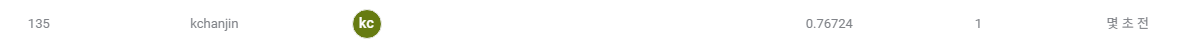

### 4) 랜덤 포레스트 모델

In [42]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

In [43]:
model.fit(x_train, y_train)

predict = model.predict(x_test)

In [44]:
submission = pd.read_csv('sample_submission.csv')
submission['Outcome'] = predict
submission.to_csv('submission_randomforest.csv', index = False)

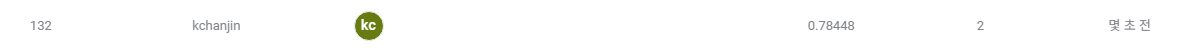

### 5) DecisionTree Classifier 모델

In [45]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

model = DecisionTreeClassifier()

In [46]:
model.fit(x_train, y_train)

predict = model.predict(x_test)

In [47]:
submission = pd.read_csv('sample_submission.csv')
submission['Outcome'] = predict
submission.to_csv('submission_decisiontreeclassifier.csv', index = False)

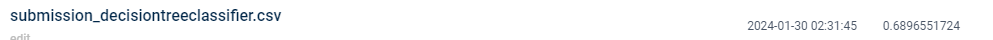

### 6) DecisionTree Regressor 모델

In [48]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

model = DecisionTreeRegressor()

In [49]:
model.fit(x_train, y_train)

predict = model.predict(x_test)

In [50]:
submission = pd.read_csv('sample_submission.csv')
submission['Outcome'] = predict
submission.to_csv('submission_decisiontreeregressor.csv', index = False)

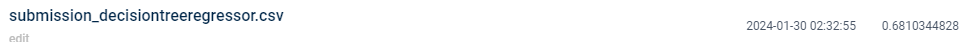

## 결과
### Dacon에 예측 결과 파일을 제출한 결과, 랜덤 포레스트 모델에서 가장 좋은 성능을 보였습니다.